In [1]:
#Machine learning related imports 

import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import(Dense, Dropout, Activation, Flatten)
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt

#To perform Http requests to update data 
import requests
#The key in the key-value pair aka dictionary must be equal to the name/id field of
#the model in django in models.py; in this case it is just "name". Any string that does
#not designate the title of a django model field will return a 400 error response code.
#201 means that post request to database thru API endpoint was successful
# r = requests.post('http://127.0.0.1:8000/tests/', json={"name":  "Chungus"})
# r.status_code

2023-04-29 10:37:20.292100: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-29 10:37:20.874087: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-29 10:37:20.874118: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-29 10:37:22.646553: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
path = os.listdir("/media/dolan/Backup Plus/Bodybuilders")
len(path)

396

In [3]:
len(os.listdir("/media/dolan/Backup Plus/Natty"))

387

In [8]:
class Data:
    
    def __init__(self):
        self.bodybuilders = []
        self.natties = []
        self.training_data = []
        self.test_data = []
        self.path = "/media/dolan/Backup Plus/"
        self.IMG_SIZE = 75
    
    def generate(self, string): #string === pathnameend
        path = os.path.join(self.path, string)
        if string == 'Bodybuilders':
            class_num = 1
        elif string == 'Natty':
            class_num = 0
        else:
            return
        counter = 0
        for img in os.listdir(path):
            if class_num == 1:
                try:
                    img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                    new_array = cv2.resize(img_array, (self.IMG_SIZE,self.IMG_SIZE))
                    self.bodybuilders.append([new_array,class_num])
                except Exception as e:
                    pass     
            elif class_num == 0:
                try:
                    img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                    new_array = cv2.resize(img_array, (self.IMG_SIZE,self.IMG_SIZE))
                    self.natties.append([new_array,class_num])
                except Exception as e:
                    pass   
            else:
                print("Classnum is not valid friend")
                
            counter += 1
            
#             print("Image resized: ", counter)


In [9]:
data = Data()
data.generate('Bodybuilders')
data.generate('Natty')

In [11]:
# data.natties

In [12]:
print(len(data.bodybuilders), len(data.natties))

396 387


### We now shuffle the data, and perform a train-test split.

In [21]:
#Shuffle the data, and 
import random

data_ = data.bodybuilders + data.natties
print(len(data_))

random.shuffle(data_)

test_split, train_split = int(0.15 * len(data_)), int(0.85 * len(data_) )


783


In [24]:
len(data_[:train_split]), len(data_[:test_split])

(665, 117)

In [38]:
def generate_inputs(dataset):
    X = []
    y = []
    for i in range(len(dataset)):
        X.append(dataset[i][0])
        y.append(dataset[i][1])
        
    return X,np.asarray(y, dtype='int32')
        

training_data = data_[:train_split]
test_data = data_[:test_split] #data_[train_split:]  
    
X_train, y_train = generate_inputs(training_data)
X_test, y_test = generate_inputs(test_data)
X, y = generate_inputs(data_)

In [39]:
len(X_train), len(y_test)

(665, 117)

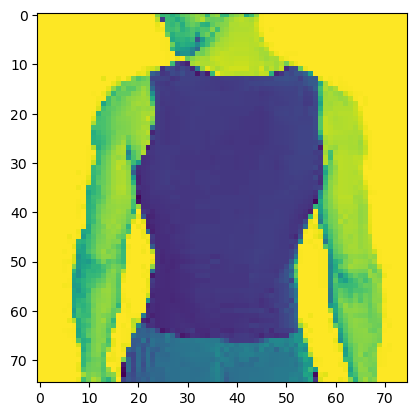

In [40]:
plt.imshow(X_train[5])

In [41]:
X_test[1].shape

(75, 75)

In [42]:
#Develop valid dataset by normalizing image arrays`

IMG_SIZE = data.IMG_SIZE
X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE,1)
X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE,1) 
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X_train = X_train/255.0
X_test = X_test/255.0
X = X/255.0

y = np.array(y)

In [43]:
y.shape, X.shape

((783,), (783, 75, 75, 1))

In [44]:
type(X_test)

numpy.ndarray

In [45]:
model = Sequential()
model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(3, 3)))


model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

# Training the model
### If loading the pretrained model (which you're supposed to do kinda) you can skip most of the above stuff and just start making predictions here

In [132]:
#model = keras.models.load_model("/home/dolan/Downloads/NattyOrNot/machine_learning/.ipynb_checkpoints/nattyornot.h5")
# model = keras.models.load_model("/home/dolan/Downloads/NattyOrNot/backend/machine_learning/.ipynb_checkpoints/nattyornot.h5")

model.summary()


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 73, 73, 256)       2560      
                                                                 
 activation_48 (Activation)  (None, 73, 73, 256)       0         
                                                                 
 dropout_35 (Dropout)        (None, 73, 73, 256)       0         
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 24, 24, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 22, 22, 256)       590080    
                                                                 
 activation_49 (Activation)  (None, 22, 22, 256)       0         
                                                     

In [46]:
'''Uncomment if you're training the model '''
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,  batch_size = 15, epochs = 15, validation_data=[X_test,y_test])

2023-04-29 10:44:57.252626: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 14962500 exceeds 10% of free system memory.


Epoch 1/15


2023-04-29 10:44:58.994101: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 81853440 exceeds 10% of free system memory.
2023-04-29 10:44:59.148699: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 81853440 exceeds 10% of free system memory.
2023-04-29 10:44:59.149107: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 81853440 exceeds 10% of free system memory.
2023-04-29 10:44:59.236264: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 20463360 exceeds 10% of free system memory.


45/45 [==============================] - 43s 925ms/step - loss: 0.6382 - accuracy: 0.6376 - val_loss: 0.6383 - val_accuracy: 0.5983
Epoch 2/15
45/45 [==============================] - 40s 884ms/step - loss: 0.5506 - accuracy: 0.7293 - val_loss: 0.5733 - val_accuracy: 0.7436
Epoch 3/15
45/45 [==============================] - 40s 897ms/step - loss: 0.5344 - accuracy: 0.7248 - val_loss: 0.5878 - val_accuracy: 0.6838
Epoch 4/15
45/45 [==============================] - 39s 877ms/step - loss: 0.5473 - accuracy: 0.7263 - val_loss: 0.5940 - val_accuracy: 0.6752
Epoch 5/15
45/45 [==============================] - 40s 896ms/step - loss: 0.5357 - accuracy: 0.7383 - val_loss: 0.6173 - val_accuracy: 0.6496
Epoch 6/15
45/45 [==============================] - 40s 883ms/step - loss: 0.5053 - accuracy: 0.7534 - val_loss: 0.5263 - val_accuracy: 0.7692
Epoch 7/15
45/45 [==============================] - 39s 875ms/step - loss: 0.4632 - accuracy: 0.7774 - val_loss: 0.5661 - val_accuracy: 0.6667
Epoch 8/15

### Let's run some predictions on our testing data. 
### Note  that although it's often not recommended to do so, 
### we can use our validation data from the training process to 
### demonstrate, as the effect of making predictions on the validation 
### data has no effect on Gradient Descent, so it is effectively 
### data that the neural net has not technically 'seen' before.

In [54]:
preds = model.predict(X_test)

4/4 [==============================] - 1s 346ms/step


In [55]:
print('Ten random predictions: ', preds[:10])

Ten random predictions:  [[0.63708544]
 [0.9127804 ]
 [0.2921787 ]
 [0.23405148]
 [0.76287115]
 [0.23749681]
 [0.14085335]
 [0.7242997 ]
 [0.19739239]
 [0.06200534]]


### Our predictions are floating point values equal to the output of 
### the sigmoid function of the output layer, between 0 and 1. 
### In order to find the rate of true and fals positives and the precision, recall of the model, we need to convert these into integer label values, 0 1 and 1 precisely. Fortunately, numpy enables us to perform multiple elementwise operations on a vector in parallel

In [57]:
preds[preds >= 0.5] = 1
preds[preds < 0.5] = 0
print('Predictions after being converted to relevant labels: ', preds[:10])

Predictions after being converted to relevant labels:  [[1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]]


In [61]:
from sklearn.metrics import confusion_matrix, classification_report
print('CONFUSION MATRIX: ')
print(confusion_matrix(y_test, preds))

CONFUSION MATRIX: 
[[62  2]
 [ 3 50]]


In [60]:
print('CLASSIFICATION REPORT: ', classification_report(y_test, preds))

CLASSIFICATION REPORT:                precision    recall  f1-score   support

           0       0.95      0.97      0.96        64
           1       0.96      0.94      0.95        53

    accuracy                           0.96       117
   macro avg       0.96      0.96      0.96       117
weighted avg       0.96      0.96      0.96       117



### As we can see, this means that our model is highly accurate 
### in being able to distinguish someone from an untested bodybuilding meet (wink-wink, nudge-nudge) from a generic non hyperathletic physique, whether naturally muscular or unfit.

### 1 indicates high likelihood of steroid use, and 0 indicates that the user is natural, aka 'Natty'!

PREDICTION:  [1.]


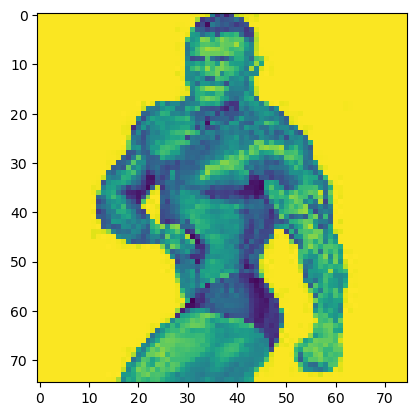

In [79]:
plt.imshow(X_test[1])
print('PREDICTION: ',preds[1])

[0.]


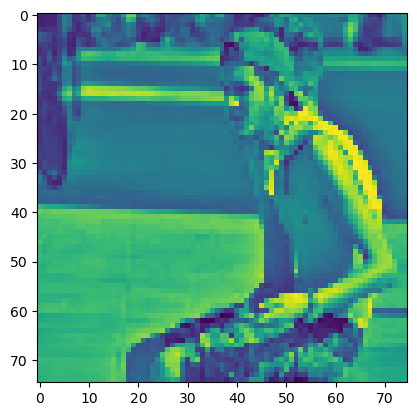

In [66]:
plt.imshow(X_test[8])
#
print(preds[8])

[0.]


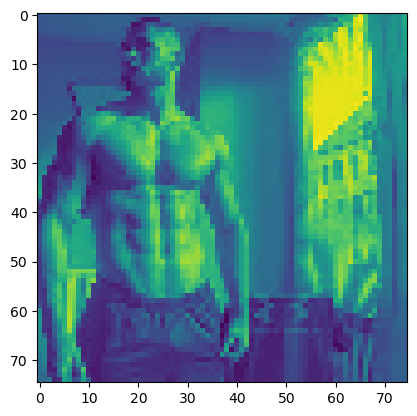

In [72]:
plt.imshow(X_test[2])
print(preds[2])

[0.]


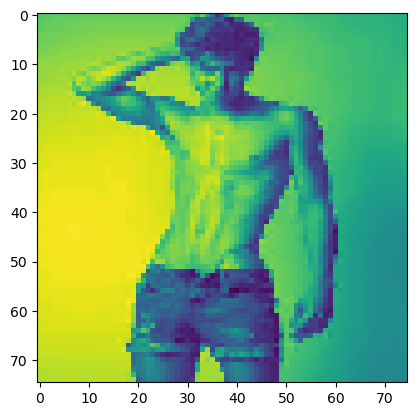

In [78]:
plt.imshow(X_test[35])
print(preds[35])

[0.]


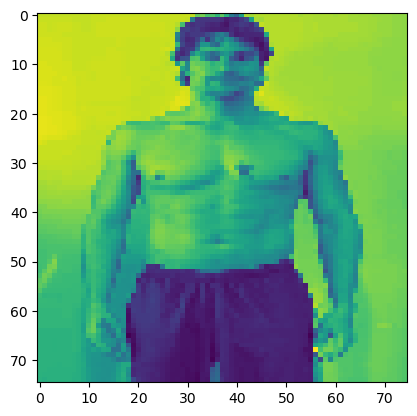

In [76]:
plt.imshow(X_test[111])
print(preds[111])

# Save The Model

In [80]:
model.save("/home/dolan/Downloads/NattyOrNot/machine_learning/.ipynb_checkpoints/nattyornot.h5")

### Generate Stack to List Most recent Image

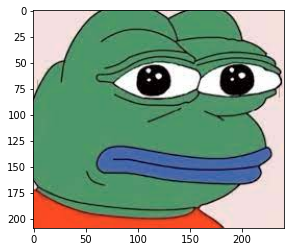

In [140]:
MEDIA = '/home/dolan/Downloads/NattyOrNot/backend/media/images/'
#len(path)

def generate(string): #string === pathnameend
    path = '/home/dolan/Downloads/NattyOrNot/backend/media/images/'
    path = os.path.join(path, string)
    IMG_SIZE = 75#125
    
    counter = 0
    
    arr = []
    
    try:
        img_array = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
        #arr.append([new_array,class_num])
    except Exception as e:
        pass     



        counter += 1

        print("Image resized: ", counter)
    return new_array


images_folder = os.listdir(MEDIA)
most_recent_upload_filename = images_folder.pop(0)
most_recent_upload = (MEDIA + most_recent_upload_filename)
most_recent_upload = cv2.imread(most_recent_upload)
#print(most_recent_upload)
plt.imshow(most_recent_upload)